In [32]:

def generar_arbol_desde_fasta_y_graficar(path_fasta, titulo_grafico="", posicion_labels=0):
    from Bio import Phylo
    from os import system
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    from Bio.Align.Applications import ClustalwCommandline
    sns.set_style('dark')
    cmd = ClustalwCommandline(r'C:\Users\Alejo\Desktop\Python\scrip_definitivo\Ejecutables\clustalw2.exe',
                              infile=path_fasta)
    std_out, std_err = cmd()


    def leer_fasta_y_extraer_nombres_cientificos(ruta_archivo=path_fasta):
        with open(ruta_archivo) as archivo:
            nombres_cientificos = {}
            for linea in archivo:
                if linea.startswith(">"):
                    codigo = linea.strip().replace(">", "")
                    codigo = codigo.split(" ")[posicion_labels]
                    if linea.find("[") == -1:
                        nombre_cientifico = codigo
                    else:
                        nombre_cientifico = linea.split("[")[-1].split("]")[0]
                    nombres_cientificos[codigo] = nombre_cientifico
        return nombres_cientificos  
    codigos_nombres = leer_fasta_y_extraer_nombres_cientificos()

    archivo_aln = path_fasta.split('.')[0] + '.aln'
    ruta_arbol = path_fasta.split('.')[0] + '.aln.treefile'
    
    # corremos iqtree con la sequiencia alineada
    system(fr"C:\Users\Alejo\Desktop\Python\scrip_definitivo\Ejecutables\iqtree.exe -s {archivo_aln} -m TEST -redo")

    arbol = Phylo.read(ruta_arbol, "newick")

    fig = plt.figure(dpi=150) #figsize=(10, 10), dpi=50)
    plt.rc('font', size=7, family='Times New Roman', weight='normal')
    plt.rc('axes', titlesize=10)
    plt.rc('text', color='navy')
    plt.rc('xtick', labelsize=6)
    plt.rc('ytick', labelsize=6)
    axes = fig.add_subplot(1, 1, 1)
    axes.title.set_text(titulo_grafico)
    Phylo.draw(tree=arbol,
               label_func=lambda n: None if n.name is None or n.name.startswith('Inner') or n.name not in codigos_nombres else codigos_nombres[n.name],
               branch_labels=lambda n: None if n.branch_length==None else round(n.branch_length, 3),
               do_show=False, axes=axes)
    plt.show()
    


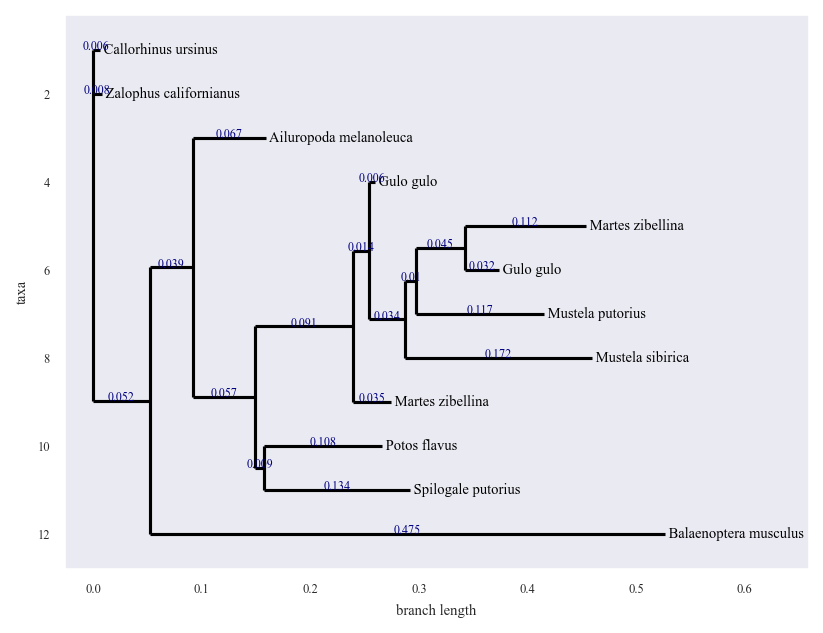

In [44]:
generar_arbol_desde_fasta_y_graficar(r'C:\Users\Alejo\Desktop\Python\scrip_definitivo\Secuencia\secuencias_scrip.fasta')